In [3]:
import pandas as pd
from pathlib import Path

In [4]:
import funcoes

In [5]:
df = pd.read_csv(Path("../data/turnover.csv"))

In [6]:
df.head()

,Idade,Turnover,ViagensTrabalho,Departamento,DistanciaCasa,NivelEducacao,Educacao,NumeroEmpregado,NivelSatisfacaoAmbiente,Genero,...,PercentualAumentoSalario,AvaliacaoDesempenho,QtdeHorasTrabalhadasPadrao,TotalAnosTrabalhados,TreinamentosUltimoAno,BalanceamentoVidaTrabalho,QtdeAnosNaEmpresaAtual,QtdeAnosNoCargoAtual,QtdeAnosDesdeUltimaPromocao,QtdeAnosComGerenteAtual
0,41.0,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,11,3,80,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,23,4,80,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,15,3,80,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,11,3,80,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,12,3,80,6,3,3,2,2,2,2


In [7]:
df.isna().mean().sort_values(ascending=False).head(5)

Idade                          0.098639
Turnover                       0.000000
QtdeAnosDesdeUltimaPromocao    0.000000
QtdeAnosNoCargoAtual           0.000000
QtdeAnosNaEmpresaAtual         0.000000
dtype: float64

In [8]:
df = df.dropna(subset='Idade')

In [9]:
df.isna().mean().sort_values(ascending=False).head(5)

Idade                          0.0
Turnover                       0.0
QtdeAnosDesdeUltimaPromocao    0.0
QtdeAnosNoCargoAtual           0.0
QtdeAnosNaEmpresaAtual         0.0
dtype: float64

In [10]:
def dropar_na(df, coluna, limite_dados_faltantes):
    if df[coluna].isna().mean() > limite_dados_faltantes: 
        df = df.dropna_na(subset=[coluna])
    return df   

In [11]:
df = funcoes.dropar_na(df, 'Idade', 0.05)

AttributeError: module 'funcoes' has no attribute 'dropar_na'

In [12]:
len(df)

1325

<Axes: >

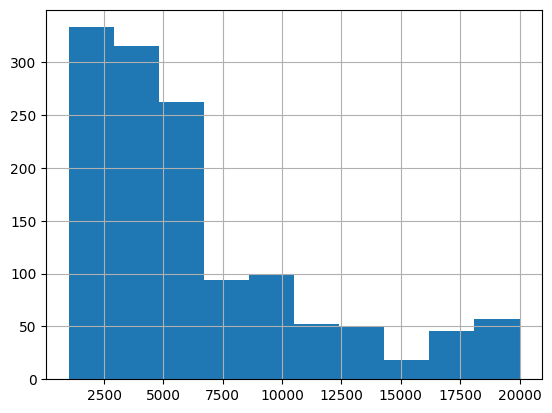

In [13]:
df['RendaMensal'].hist()

<Axes: >

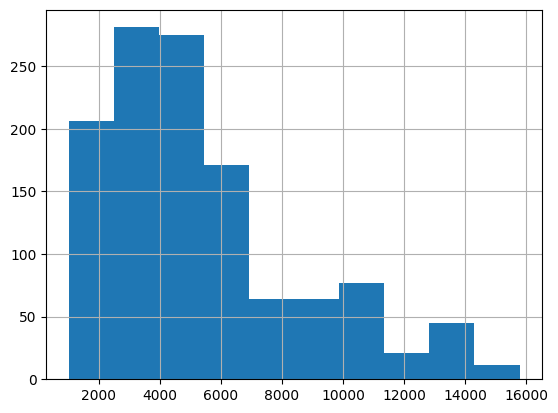

In [88]:
#verificar outliers

Media = df['RendaMensal'].mean()
Desvio_Padrao = df['RendaMensal'].std()
Limite_Superior = Media + 2*Desvio_Padrao
Limite_Inferior = Media - 2*Desvio_Padrao
df = df[(df['RendaMensal'] > Limite_Inferior) & (df['RendaMensal'] < Limite_Superior)]
df['RendaMensal'].hist()


In [14]:
def limpar_outlier (df, coluna):
    Media = df[coluna].mean()    
    Desvio_Padrao = df[coluna].std()
    Limite_Superior = Media + 2*Desvio_Padrao
    Limite_Inferior = Media - 2*Desvio_Padrao
    df = df[(df[coluna] > Limite_Inferior) & (df[coluna] < Limite_Superior)]

    return df  


In [15]:
df = funcoes.limpar_outlier(df, 'RendaMensal')
df = funcoes.limpar_outlier(df, 'Idade')

AttributeError: module 'funcoes' has no attribute 'limpar_outlier'

In [91]:
Limite_Superior

np.float64(15801.795919014601)

In [92]:
Limite_Inferior

np.float64(-2880.2895039202613)

<Axes: >

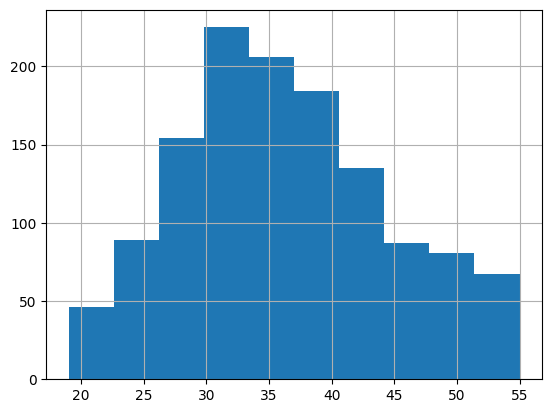

In [16]:
Media = df['Idade'].mean()
Desvio_Padrao = df['Idade'].std()
Limite_Superior = Media + 2*Desvio_Padrao
Limite_Inferior = Media - 2*Desvio_Padrao
df = df[(df['Idade'] > Limite_Inferior) & (df['Idade'] < Limite_Superior)]
df['Idade'].hist()